In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/user/Downloads/미니프로젝트-쇼핑몰 실습데이터.xlsx")

# RFM 분석에 필요한 용어
* RFM 분석: 아래의 세 요소를 따라 분류 및 평가하는 분석
    * : Recency 얼마나 최근에 구매했는가
    * : Frequency 얼마나 자주 구매했는가
    * : Monetary 얼마나 많이 지출했는가
* RFM 분석의 분류
    * 충성도(상기 요소를 종합적으로 고려)에 따른 분류
    * 구매 빈도에 따른 분류
    * 지출금액에 따른 분류
    * 이외에도 주관적으로 분류 기준 수립이 가능
    * 정해진 기준이 없어 자유롭게 분류 가능

# 분석 진행하기
 # <필수 분석>
 1. 사용자의 충성도 분류 (3그룹) 진행  
     a. 분류의 제한은 없으나 분류의 논리가 필요
     
 2. 수익을 정리해 시각화해보자  
     a. 월별, 연도별 매출  
     b. 월별 실제 수익 (처리상황, 할부기간 고려)  
     c. 월별 시각화에서 연도의 변화는 무시한다  
     
 3. 결제방법에 따른 결제금액 분석  
     a. 결제방법에 따른 결제금액에 유의미한 차이가 있는지 분석 후 시각화해보자  
     b. 결제방법이 여러 조합일 경우, 맨 앞의 한가지만 사용한 것으로 간주한다  
     
# <선택 분석>
1. 상품별 분석  
    a. 최대 매출 상품 3가지를 집계한다  
    b. 주문연도에 따라 해당 상품의 매출 증감을 통계적으로 확인한다  
2. 연관성 분석  
    a. 판다스의 corr() 함수 또는 다른 패키지의 유사 기능을 이용  
    b. 주문한 달과 판매금액의 상관관계가 있는지 확인하자  
    c. 단, 연도의 변화는 무시한다  

In [3]:
df.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN


In [4]:
df['주문번호'].unique()

array([191213170236874, 191216100347429, 191216173241622, ...,
       221108104536307, 221108104735216, 221108105148171], dtype=int64)

In [5]:
len(df['주문번호'].unique())

154795

In [ ]:
charge = []

for o in df['주문번호'].unique():
    m = df['주문번호'] == o
    df_mask = df[m]
    
    charge.append([o, df_mask['판매금액'].sum()])

In [ ]:
pd.DataFrame(charge, columns = ['주문번호', '판매금액총계'])

In [ ]:
charge_res = pd.DataFrame(charge, columns = ['주문번호', '판매금액총계'])

In [ ]:
charge_res.sort_values('판매금액총계', ascending=False) # True는 오름차순 False는 내림차순

In [ ]:
df

In [ ]:
num_sum = []

for o in df['주문번호'].unique():
    m = df['주문번호'] == o
    df_mask2 = df[m]
    
    num_sum.append([o, df_mask2['주문수량'].sum()])

In [ ]:
pd.DataFrame(num_sum, columns = ['주문번호', '주문수량총계'])

In [ ]:
num_sum_res = pd.DataFrame(num_sum, columns = ['주문번호', '주문수량총계'])

In [ ]:
num_sum_res.sort_values('주문수량총계', ascending=False)

In [6]:
df['주문일자'].apply(lambda x: str(x).split('-')[1])

0         12
1         12
2         12
3         12
4         12
          ..
218596    11
218597    11
218598    11
218599    11
218600    11
Name: 주문일자, Length: 218601, dtype: object

In [7]:
df['주문월'] = df['주문일자'].apply(lambda x: str(x).split('-')[1])

In [8]:
df['주문월'].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

Text(0.5, 1.0, 'charge per month')

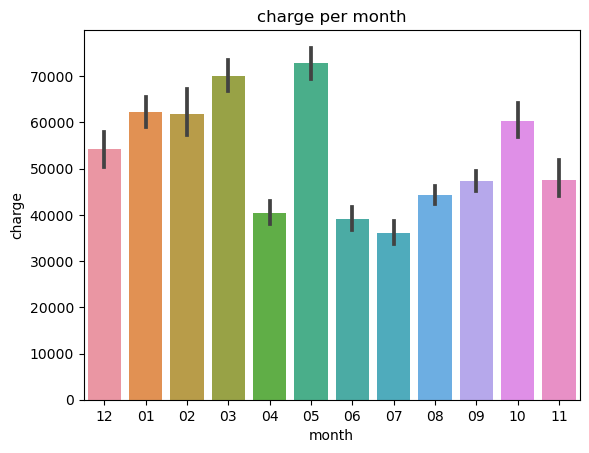

In [11]:
sns.barplot(data = df, x = '주문월', y = '판매금액')
plt.xlabel('month')
plt.ylabel('charge')
plt.title('charge per month')

In [12]:
df['할부기간'].unique()

array([nan, '12개월', '1개월', '24개월', '6개월', '18개월'], dtype=object)

# 할부기간을 고려하는 법
1. nan 값은 일시불 (=1개월)로 처리한다
2. 6개월은 1~6월에 나눠 더한다 (6등분)
3. 12개월은 각 월별로 나눠 더한다 (12등분)
4. 24개월은 12월과 같이 처리한다 (연도를 무시하기 때문)
5. 18개월은 각 월별로 나눠 더한 뒤, 1~6월에 나눠 한번 더 더한다

In [13]:
def processing(x):
    if x != x or x == '1개월': # nan값인지 아닌지 확인하는 코드
        return 1
    elif x == '24개월':
        return 12
    elif x == '6개월': # 한자리 숫자라서 따로 처리
        return 6
    else:
        return int(x[:2]) # 12개월, 18개월

df['할부기간'].apply(lambda x: processing(x))

0         1
1         1
2         1
3         1
4         1
         ..
218596    1
218597    1
218598    1
218599    1
218600    1
Name: 할부기간, Length: 218601, dtype: int64

In [14]:
df['할부기간'] = df['할부기간'].apply(lambda x: processing(x))

In [19]:
df['할부기간'].unique()

array([ 1, 12,  6, 18], dtype=int64)

In [16]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,1,12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,1,12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,1,12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,1,12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,1,11
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,1,11
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,1,11
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,1,11


In [49]:
charge_by_month = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1, 12, 6, 18
for i in df.index:
    charge = df.loc[i, '판매금액']
    month = int(df.loc[i, '주문월'])
    dividing = df.loc[i, '할부기간']
    
    charge_by_month[month-1] = charge
    
    if dividing == 1:
        charge_by_month = [c+(charge/1) for c in charge_by_month]
    
    elif dividing == 12:
        charge_by_month = [c+(charge/12) for c in charge_by_month]
        
    elif dividing == 6:
        if month < 8:           
            for j in range(6):
                charge_by_month[month-1+j] += charge/6
                
        else:            
            for j in range(6):               
                if month < 8:                   
                    charge_by_month[month-1+j] += charge/6
                else:
                    charge_by_month[month-13+j] += charge/6
                    
    elif dividing == 18:
        charge_by_month = [c+(charge/18) for c in charge_by_month]
        
        if month < 8:
            for j in range(6):
                charge_by_month[month-1+j] += charge/18
        else:
            for j in range(6):
                if month < 8:
                    charge_by_month[month-1+j] += charge/18
                else:
                    charge_by_month[month-13+j] += charge/18 # 12달 뺀거
        
        

In [51]:
charge_by_month

[5147176440.0,
 4678031715.0,
 3813572760.0,
 3344397295.0,
 2386406525.0,
 1996584740.0,
 1642547185.0,
 1006392950.0,
 613364110.0,
 179986340.0,
 323000.0,
 5728454410.0]

In [24]:
48 / 12

4.0

In [25]:
48 / 24

2.0

In [26]:
54 / 12

4.5

In [27]:
54 / 24

2.25

In [28]:
# 24로 나누나 12로 나누나 값은 같음. 2로 한번 더 나누어 주는 것인데 12가 이미 24/2 이므로 24개월은 12개월로 바꿔 계산해도 됨.

In [52]:
pd.DataFrame(charge_by_month)

,0
0,5.147176e+09
1,4.678032e+09
2,3.813573e+09
3,3.344397e+09
4,2.386407e+09
5,1.996585e+09
6,1.642547e+09
7,1.006393e+09
8,6.133641e+08
9,1.799863e+08


In [53]:
charge_by_month = pd.DataFrame(charge_by_month)

In [54]:
charge_by_month["1"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [55]:
charge_by_month

,0,1
0,5.147176e+09,1
1,4.678032e+09,2
2,3.813573e+09,3
3,3.344397e+09,4
4,2.386407e+09,5
5,1.996585e+09,6
6,1.642547e+09,7
7,1.006393e+09,8
8,6.133641e+08,9
9,1.799863e+08,10


Text(0.5, 1.0, 'charge per month')

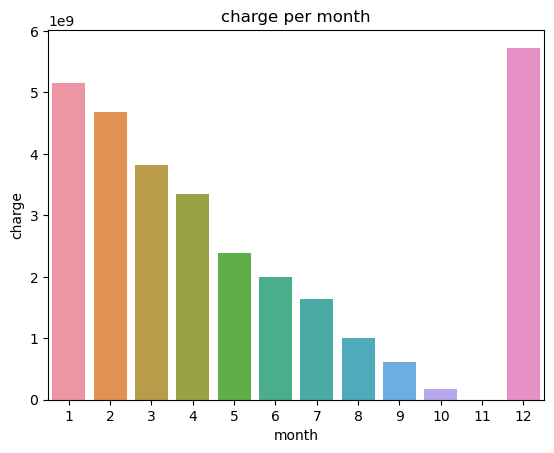

In [56]:
sns.barplot(data = charge_by_month, x = '1', y = 0)
plt.xlabel('month')
plt.ylabel('charge')
plt.title('charge per month')

In [101]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '-', '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', ' + 포'], dtype=object)

In [102]:
df['결제방법'] = df['결제방법'].fillna('-') #nan값 -값으로 변경

In [121]:
df['결제방법정리'] = df['결제방법'].apply(lambda x: x[0])

In [104]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문월,결제방법정리,판매금액_로그
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,1,12,신,12.287713
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,1,12,신,12.287713
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,1,12,신,16.042600
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,1,12,신,14.872675
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,1,12,신,9.550749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,1,11,웰,15.095067
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,1,11,웰,14.715319
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,1,11,신,14.715319
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,1,11,포,11.983707


<AxesSubplot:xlabel='결제방법정리', ylabel='판매금액'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\

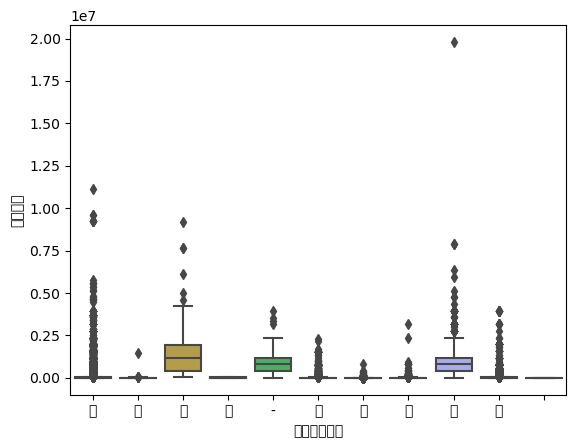

In [61]:
sns.boxplot(data = df, x = '결제방법정리', y = '판매금액')

In [63]:
import math

In [105]:
df['판매금액_로그'] = df['판매금액'].apply(lambda x: math.log2(x+0.001))

In [147]:
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:xlabel='결제방법정리', ylabel='판매금액_로그'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


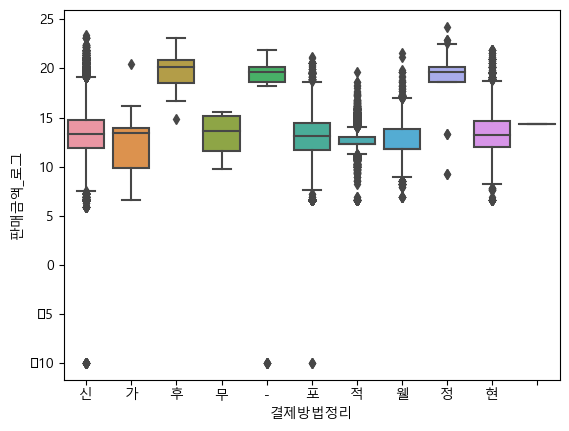

In [107]:
sns.boxplot(data = df, x = '결제방법정리', y = '판매금액_로그')

In [120]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '-', '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', ' + 포'], dtype=object)

In [122]:
df['결제방법정리'].unique()

array(['신', '가', '후', '무', '-', '포', '적', '웰', '정', '현', ' '],
      dtype=object)

In [110]:
# 위쪽은 평균적으로 결제 금액이 높은 편, 아래쪽은 평균적으로 결제 금액이 낮은 편

In [111]:
!pip install statannot

In [112]:
from statannot import add_stat_annotation 

In [124]:
def type_processing(x):
    if x == '신':
        return 'Card'
    
    if x == '가':
        return 'Virtual Account'
    
    if x == '후':
        return 'After Payment'
    
    if x == '무':
        return 'Account'
    
    if x == '-' or x == ' ':
        return 'Etc.'
    
    if x == '포' or x == '적' or x == '웰':
        return 'Point'
    
    if x == '정':
        return 'Regular Payment'
    
    if x == '현':
        return 'Cash'

In [127]:
df['결제방법정리'] = df['결제방법정리'].apply(lambda x: type_processing(x))

In [128]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문월,결제방법정리,판매금액_로그
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,1,12,Card,12.287713
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,1,12,Card,12.287713
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,1,12,Card,16.042600
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,1,12,Card,14.872675
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,1,12,Card,9.550749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,1,11,Point,15.095067
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,1,11,Point,14.715319
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,1,11,Card,14.715319
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,1,11,Point,11.983707


In [129]:
df['결제방법정리'].unique()

array(['Card', 'Virtual Account', 'After Payment', 'Account', 'Etc.',
       'Point', 'Regular Payment', 'Cash'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Card'),
  Text(1, 0, 'Virtual Account'),
  Text(2, 0, 'After Payment'),
  Text(3, 0, 'Account'),
  Text(4, 0, 'Etc.'),
  Text(5, 0, 'Point'),
  Text(6, 0, 'Regular Payment'),
  Text(7, 0, 'Cash')])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


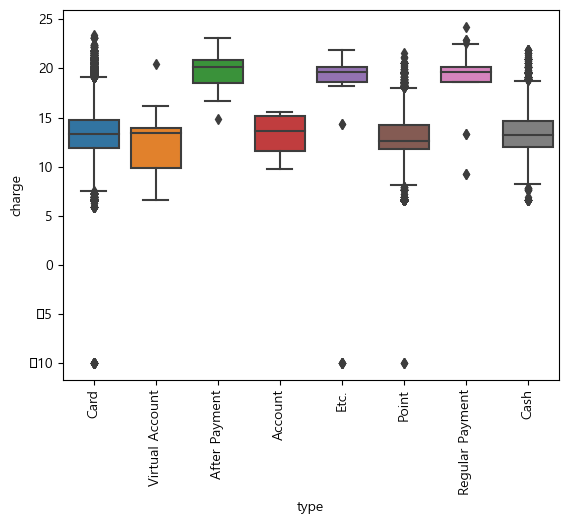

In [148]:
sns.boxplot(data=df, x='결제방법정리', y='판매금액_로그')
plt.xlabel('type')
plt.ylabel('charge')
plt.xticks(rotation=90)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Card v.s. Virtual Account: t-test independent samples with Bonferroni correction, P_val=9.491e-02 stat=2.262e+00
Card v.s. After Payment: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-5.286e+01
Card v.s. Account: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.609e-01
Card v.s. Etc.: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-9.396e+01


C:\ProgramData\Anaconda3\lib\site-packages\statannot\statannot.py:593: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()


(<AxesSubplot:xlabel='type', ylabel='charge'>,
  <statannot.StatResult.StatResult at 0x22b8cfc4f40>])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


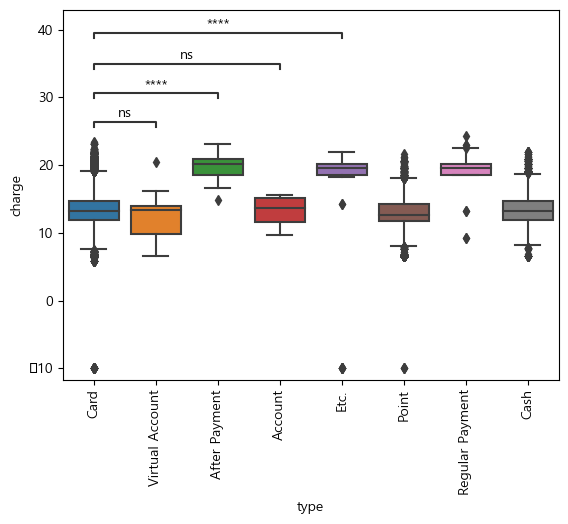

In [150]:
ax = plt.subplot()
sns.boxplot(data=df, x='결제방법정리', y='판매금액_로그')
plt.xlabel('type')
plt.ylabel('charge')
plt.xticks(rotation=90)

add_stat_annotation(ax,
                   data = df,
                   x = '결제방법정리',
                   y = '판매금액_로그',
                   box_pairs = [(('Card'), ('Virtual Account')),
                               (('Card'), ('After Payment')),
                               (('Card'), ('Account')),
                               (('Card'), ('Etc.'))],
                   test = 't-test_ind',
                   text_format = 'star',
                   loc = 'inside',
                   verbose = 2)

In [151]:
from scipy import stats

In [152]:
stats.shapiro(df['판매금액'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.20134729146957397, pvalue=0.0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='판매금액', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


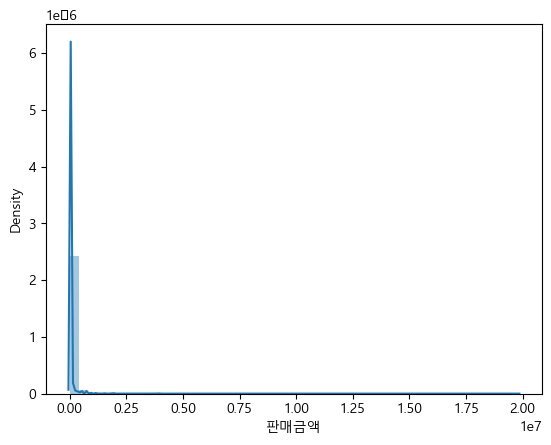

In [153]:
sns.distplot(df['판매금액'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='판매금액_로그', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


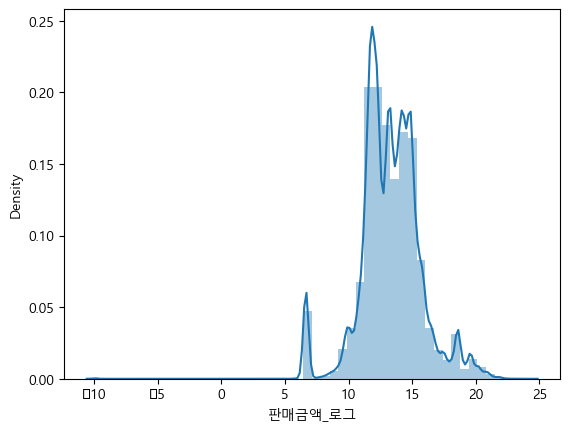

In [154]:
sns.distplot(df['판매금액_로그'])

In [155]:
stats.shapiro(df['판매금액_로그'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9571788907051086, pvalue=0.0)

((array([-4.51466627, -4.32298362, -4.21896726, ...,  4.21896726,
          4.32298362,  4.51466627]),
  array([       0,        0,        0, ...,  9600000, 11130000, 19800000],
        dtype=int64)),
 (99213.45347820267, 52759.01132657216, 0.44858449833266983))

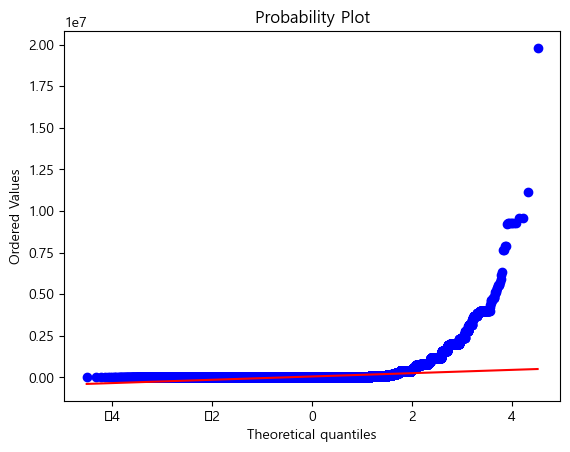

In [156]:
stats.probplot(df['판매금액'], plot=plt)

((array([-4.51466627, -4.32298362, -4.21896726, ...,  4.21896726,
          4.32298362,  4.51466627]),
  array([-9.96578428, -9.96578428, -9.96578428, ..., 23.19460298,
         23.40795026, 24.23899709])),
 (2.369647680779799, 13.319049561532854, 0.9784806303690355))

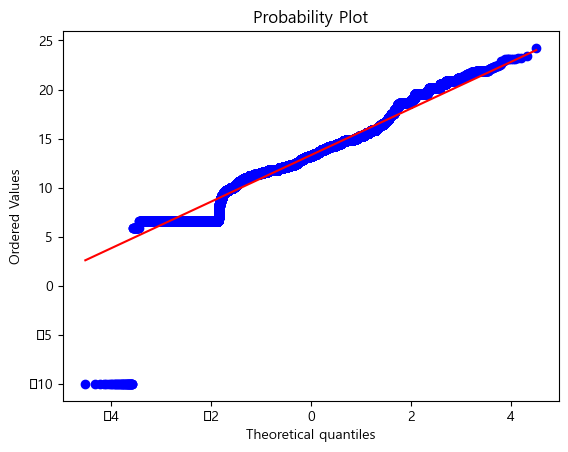

In [131]:
stats.probplot(df['판매금액_로그'], plot=plt)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Card v.s. Virtual Account: t-test independent samples with Bonferroni correction, P_val=9.491e-02 stat=2.262e+00
Card v.s. After Payment: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-5.286e+01
Card v.s. Account: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.609e-01
Card v.s. Etc.: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-9.396e+01


(<AxesSubplot:xlabel='type', ylabel='charge'>,
  <statannot.StatResult.StatResult at 0x22b8f961850>])

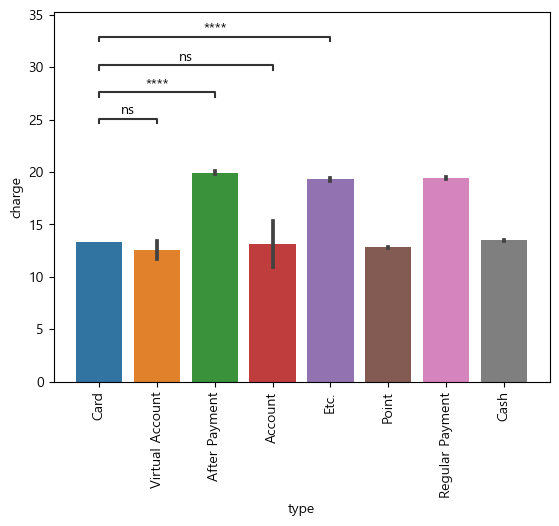

In [157]:
ax = plt.subplot()
ax = sns.barplot(data=df, x='결제방법정리', y='판매금액_로그')
plt.xlabel('type')
plt.ylabel('charge')
plt.xticks(rotation=90)

add_stat_annotation(ax, 
                    data=df, 
                    x = '결제방법정리', 
                    y = '판매금액_로그',
                    box_pairs=[(('Card'), ('Virtual Account')),
                              (('Card'), ('After Payment')),
                              (('Card'), ('Account')),
                              (('Card'), ('Etc.'))],
                    test='t-test_ind', 
                    text_format='star', 
                    loc='inside', 
                    verbose=2)

In [132]:
gini = df[df['업체명'] == '지니']['판매금액']
ace = df[df['업체명'] == '에이스디포']['판매금액']

In [135]:
gini = (list(gini[:100]))

In [136]:
gini

[5000,
 5000,
 67500,
 30000,
 750,
 16000,
 6000,
 20000,
 105000,
 105000,
 20000,
 5000,
 3000,
 4000,
 48000,
 6000,
 2000,
 1000,
 9000,
 12000,
 6000,
 2000,
 1000,
 9000,
 12000,
 32000,
 7500,
 5000,
 5000,
 6000,
 15000,
 4000,
 5000,
 6000,
 15000,
 4000,
 7500,
 30000,
 15000,
 15000,
 15000,
 15000,
 15000,
 15000,
 32000,
 4000,
 3000,
 25000,
 15000,
 6000,
 6000,
 8000,
 6200,
 15000,
 20000,
 15000,
 6000,
 6000,
 8000,
 6200,
 15000,
 20000,
 32000,
 105000,
 6000,
 6000,
 2000,
 1000,
 9000,
 12000,
 6000,
 4000,
 6000,
 4000,
 2000,
 12000,
 11500,
 8000,
 15000,
 32000,
 32000,
 30000,
 48000,
 32000,
 23000,
 15000,
 32000,
 22500,
 6000,
 5000,
 6000,
 30000,
 32000,
 31000,
 12000,
 18000,
 15000,
 15000,
 15000,
 36000]

In [137]:
ace = (list(ace[:100]))

In [138]:
stats.spearmanr(gini, ace)

SpearmanrResult(correlation=-0.06588898718556489, pvalue=0.5148436221975197)

<AxesSubplot:>

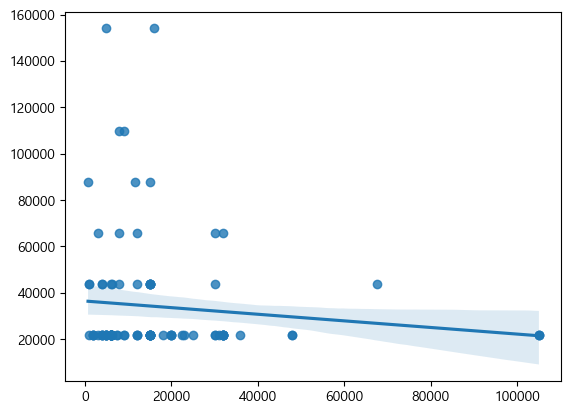

In [142]:
sns.regplot(gini, ace)

In [ ]:
# 무질서도가 매우 크다, 상관관계가 매우 없다

In [139]:
list1 = list(range(100))
list2 = list(range(0, 200, 2))

In [140]:
stats.spearmanr(list1, list2) # 정비례 관계, 상관관계가 있다

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

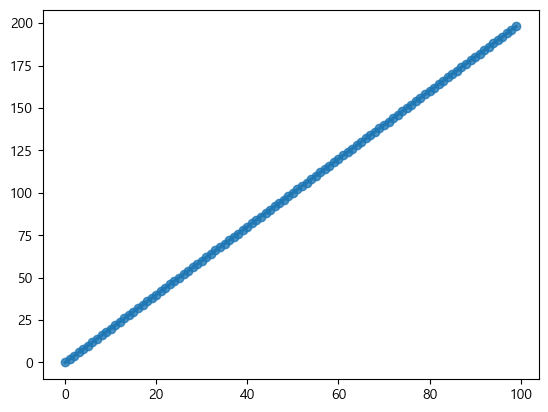

In [141]:
sns.regplot(list1, list2)

In [143]:
list1 = list(range(100))
list2 = list(range(200, 0, -2)) # 반대로 가는 것도 마찬가지

In [144]:
stats.spearmanr(list1, list2)

SpearmanrResult(correlation=-0.9999999999999999, pvalue=0.0)

<AxesSubplot:>

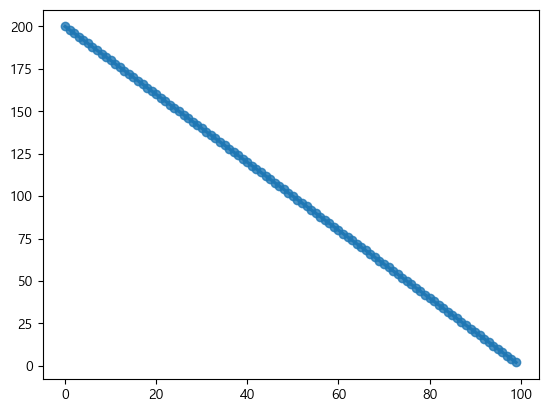

In [145]:
sns.regplot(list1, list2)